In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import TensorBoard
from keras import backend as K
from keras.utils import to_categorical
from keras.datasets import cifar10
if K.backend()=='tensorflow':
    K.set_image_data_format("channels_last")

Using TensorFlow backend.
C:\Users\gmnya\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gmnya\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gmnya\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gmnya\Anaconda3\lib\site-packages\tensorboard\comp

In [2]:
# Importing more python libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the CIFAR-10 Python dataset from the website
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Loading the classes and labels
classes = 10
cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

horse


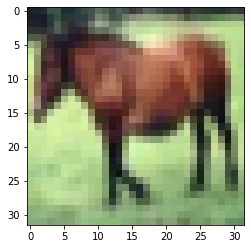

In [5]:
# check one image
r = 7
plt.imshow(x_train[r])
print(cifar_labels[y_train[r][0]])

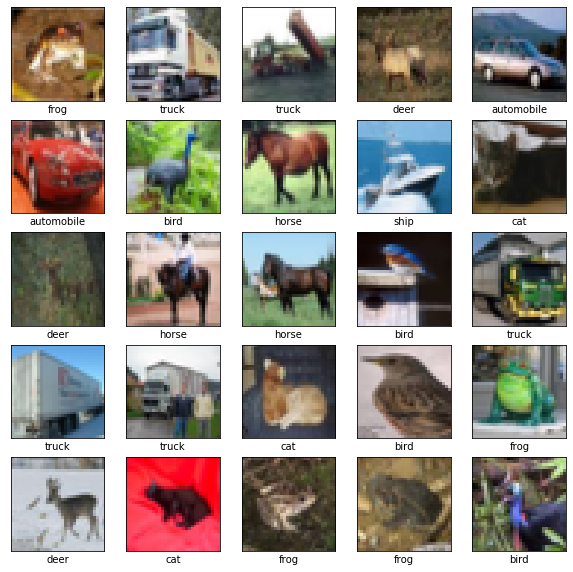

In [6]:
# view the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(cifar_labels[y_train[i][0]])
plt.show()

In [7]:
# Normalizing
mean = np.mean(x_train, axis = (0,1,2,3))
std = np.std(x_train, axis = (0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
mean

120.70756512369792

In [8]:
# one hot encoding
y_train = to_categorical(y_train, classes, dtype=int)
y_test = to_categorical(y_test, classes, dtype=int)

In [9]:
# Checking the shape
print(x_train.shape)
y_train.shape

(50000, 32, 32, 3)


(50000, 10)

In [10]:
# set the input shape
input_shape = (32,32,3)

In [11]:
# Create the model
def cifar10Model():
    model = Sequential()
    # first layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
    model.add(Dropout(0.2))
    
    # second layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
    model.add(Dropout(0.2))
    
    # third layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
    model.add(Dropout(0.2))
    
    # last layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation='softmax'))
    
    return model  

In [12]:
# Clear cache
K.clear_session()
model = cifar10Model()

In [13]:
# Compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [15]:
batch_size = 64
epochs = 100

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 292s 6ms/step - loss: 1.9736 - accuracy: 0.2734 - val_loss: 1.6177 - val_accuracy: 0.4181
Epoch 2/100
50000/50000 [==============================] - 287s 6ms/step - loss: 1.6131 - accuracy: 0.4034 - val_loss: 1.4323 - val_accuracy: 0.4753
Epoch 3/100
50000/50000 [==============================] - 278s 6ms/step - loss: 1.4672 - accuracy: 0.4595 - val_loss: 1.3283 - val_accuracy: 0.5229
Epoch 4/100
50000/50000 [==============================] - 274s 5ms/step - loss: 1.3557 - accuracy: 0.5051 - val_loss: 1.2219 - val_accuracy: 0.5634
Epoch 5/100
50000/50000 [==============================] - 280s 6ms/step - loss: 1.2668 - accuracy: 0.5399 - val_loss: 1.1538 - val_accuracy: 0.5877
Epoch 6/100
50000/50000 [==============================] - 269s 5ms/step - loss: 1.1912 - accuracy: 0.5736 - val_loss: 1.0643 - val_accuracy: 0.6207
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 259s 5ms/step - loss: 0.3974 - accuracy: 0.8579 - val_loss: 0.5691 - val_accuracy: 0.8096
Epoch 56/100
50000/50000 [==============================] - 263s 5ms/step - loss: 0.3945 - accuracy: 0.8598 - val_loss: 0.5457 - val_accuracy: 0.8187
Epoch 57/100
50000/50000 [==============================] - 260s 5ms/step - loss: 0.3830 - accuracy: 0.8620 - val_loss: 0.5571 - val_accuracy: 0.8187
Epoch 58/100
50000/50000 [==============================] - 258s 5ms/step - loss: 0.3838 - accuracy: 0.8634 - val_loss: 0.5649 - val_accuracy: 0.8163
Epoch 59/100
50000/50000 [==============================] - 265s 5ms/step - loss: 0.3767 - accuracy: 0.8662 - val_loss: 0.5506 - val_accuracy: 0.8234
Epoch 60/100
50000/50000 [==============================] - 259s 5ms/step - loss: 0.3746 - accuracy: 0.8666 - val_loss: 0.5518 - val_accuracy: 0.8203
Epoch 61/100
50000/50000 [==============================] - 264s 5ms/step - loss: 0.3654 - accuracy: 0.8705 - val

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Text(0.5, 1.0, 'Loss curves')

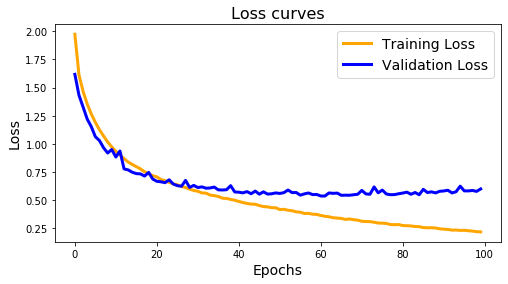

In [17]:
# loss curves
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], 'orange',linewidth=3.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14, loc = 'upper right')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss curves', fontsize=16)

Text(0.5, 1.0, 'Accuracy curves')

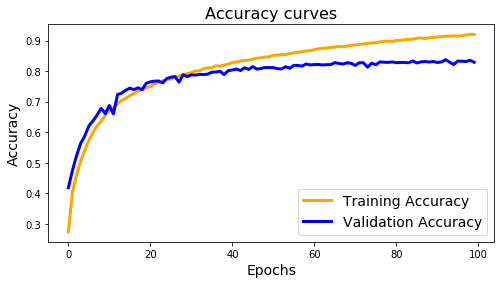

In [18]:
# Accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], 'orange',linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14, loc = 'lower right')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy curves', fontsize=16)

In [19]:
# Make a prediction
prediction = model.predict(x_test, batch_size=32)

In [20]:
print(prediction[0])

[1.0502888e-06 3.3033997e-05 8.5191732e-06 8.8546669e-01 6.3593677e-07
 5.2210707e-02 6.2278409e-02 2.6313069e-07 3.8294931e-07 3.0585676e-07]


In [21]:
labels_pred = np.argmax(prediction, axis=1)
labels_pred =np.array(labels_pred)
print(labels_pred)

[3 8 8 ... 5 1 7]


In [22]:
labels_test = np.argmax(y_test, axis=1)
print(labels_test)

[3 8 8 ... 5 1 7]


In [23]:
correct = (labels_pred == labels_test)
print(correct)
print("Number of correct predictions: %d" % sum(correct))

[ True  True  True ...  True  True  True]
Number of correct predictions: 8289


In [24]:
num_images = len(correct)
parcent = (sum(correct)*100)/num_images
print('Accuracy: %.2f%%' % parcent)

Accuracy: 82.89%


In [25]:
incorrect = (correct == False)
print(incorrect)

[False False False ... False False False]


In [26]:
# Images of the test-set that have been incorrectly classified.
images_error = x_test[incorrect]

# Get predicted classes for those images
labels_error = labels_pred[incorrect]

# Get true classes for those images
labels_true = labels_test[incorrect]

In [27]:
print(labels_true)

[8 0 5 ... 5 2 5]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


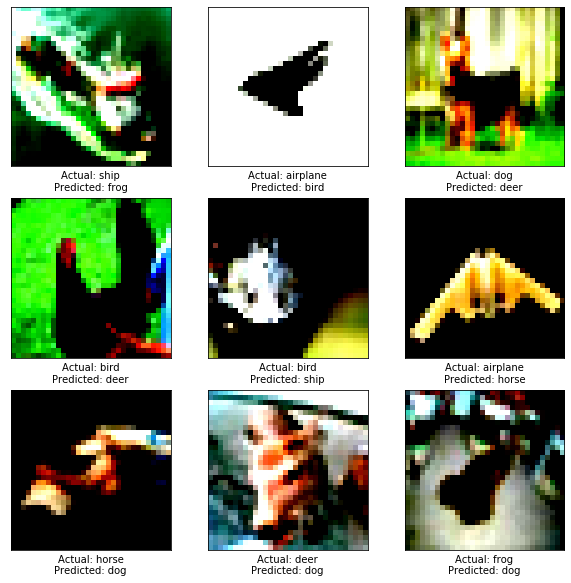

In [28]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_error[i])
    plt.xlabel('Actual: %s\nPredicted: %s'%(cifar_labels[labels_true[i]], cifar_labels[labels_error[i]]))
plt.show()

In [29]:
'''
classes = 10
cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
'''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=labels_true, y_pred=labels_error)
for i in range(classes):
    class_name = "({}) {}".format(i, cifar_labels[i])
    print(cm[i, :], class_name)
    
class_numbers = ["({0})".format(i) for i in range(classes)]
print("".join(class_numbers))

[ 0  9 36 11 17  4  5 13 46 25] (0) airplane
[ 7  0  0  2  2  3  9  1 17 69] (1) automobile
[37  1  0 35 99 51 50 14  8  2] (2) bird
[  8   3  44   0  71 160  44  27   6  11] (3) cat
[ 8  0 20 23  0 23 21 22  6  2] (4) deer
[  4   1  11 105  47   0  16  27   3   3] (5) dog
[ 5  0 20 30 30 20  0  1  3  3] (6) frog
[ 4  0 10 28 46 47  3  0  0  7] (7) horse
[29 12  4  4  6  4  5  1  0 22] (8) ship
[ 9 33  3  7  0  0  4  6 16  0] (9) truck
(0)(1)(2)(3)(4)(5)(6)(7)(8)(9)


In [43]:
# load the image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image(filename):
    img = load_img(filename, target_size=(32, 32))
    img = img_to_array(img)
    img = img.reshape(1, 32, 32, 3)
    img = img.astype('float32')
    img = (img-mean)/(std+1e-7)
    return img

img= load_image('images/sample_image1.jpg')
result = model.predict(img, batch_size=None, steps=1)
test = np.argmax(result, axis=1)
test =np.array(test)
print(cifar_labels[test[0]])

automobile
